# Car Insurance Modelling

Car Insurance Modelling involves using statistical and mathematical models to accurately predict variables like claim frequency, severity, and total cost. This predictive capability is crucial for setting insurance product prices, efficient risk management, and optimizing overall business strategies.






Car Insurance Modelling is a statistical approach used by Insurance companies to predict and assess risks associated with insuring cars and drivers. It typically involves using historical data on insurance claims, customer demographics, vehicle details, and other relevant factors to predict future claims, set premiums, and understand risk factors.

The dataset provided for Car Insurance Modelling consists of information related to drivers and their vehicle claims. Key variables include:

age_of_driver: The age of the driver. <br>
car_age: The age of the car in years.<br>
region: The geographical region where the driver resides (e.g., Urban, Rural, Suburban).<br>
number_of_claims: The count of claims made by the driver.<br>

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [211]:
insurance_data = pd.read_csv("insurance_claims.csv")
insurance_data.head()

,age_of_driver,car_age,region,number_of_claims
0,30,7,Urban,0
1,33,10,Rural,2
2,39,11,Suburban,1
3,18,12,Urban,0
4,21,8,Urban,0


In [212]:
insurance_data.describe(include='all')

,age_of_driver,car_age,region,number_of_claims
count,1000.000000,1000.000000,1000,1000.000000
unique,NaN,NaN,3,NaN
top,NaN,NaN,Rural,NaN
freq,NaN,NaN,343,NaN
mean,33.112000,6.673000,NaN,0.675000
std,9.253598,4.377583,NaN,0.822223
min,18.000000,0.000000,NaN,0.000000
25%,25.000000,3.000000,NaN,0.000000
50%,33.000000,6.000000,NaN,0.000000
75%,41.000000,11.000000,NaN,1.000000


In [213]:
insurance_data.describe()

,age_of_driver,car_age,number_of_claims
count,1000.000000,1000.000000,1000.000000
mean,33.112000,6.673000,0.675000
std,9.253598,4.377583,0.822223
min,18.000000,0.000000,0.000000
25%,25.000000,3.000000,0.000000
50%,33.000000,6.000000,0.000000
75%,41.000000,11.000000,1.000000
max,49.000000,14.000000,5.000000


In [214]:
insurance_data.isnull().sum()

age_of_driver       0
car_age             0
region              0
number_of_claims    0
dtype: int64

In [215]:
 insurance_data.isna().sum()

age_of_driver       0
car_age             0
region              0
number_of_claims    0
dtype: int64

<b>Exploring Distributions: Age of Driver, Car Age, and Number of Claims in Insurance Data

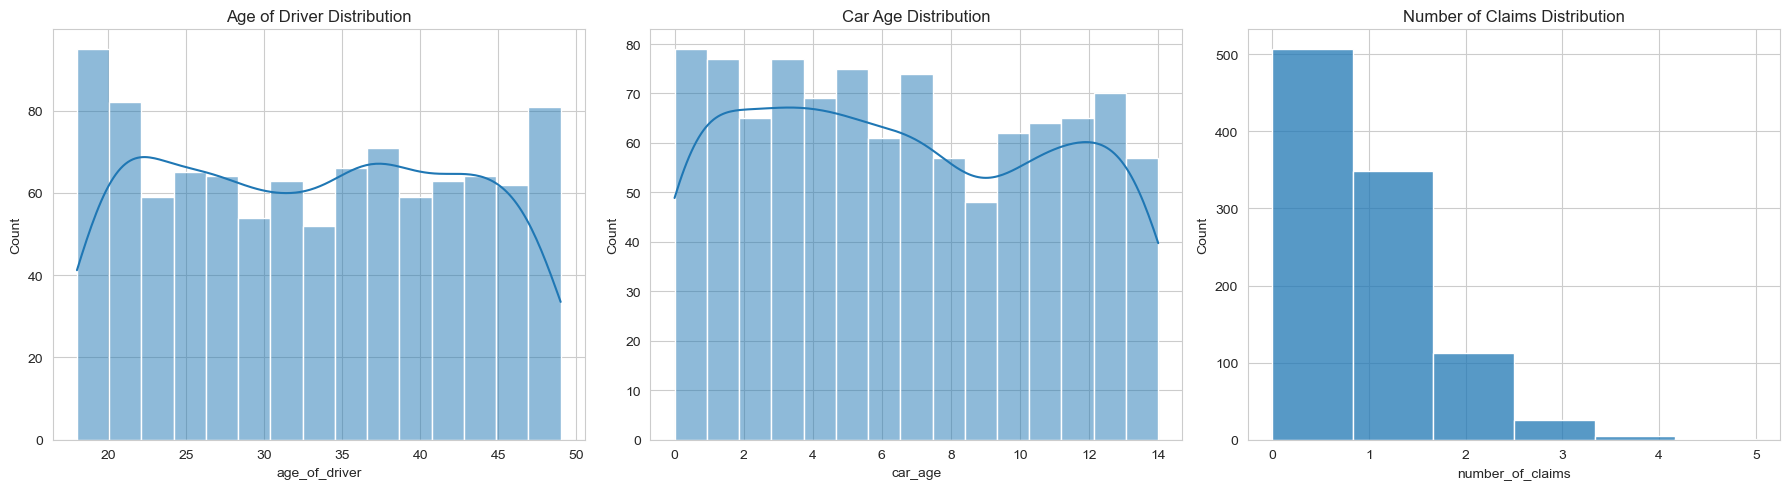

In [216]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,3,figsize = (18,5))
1
sns.histplot(insurance_data['age_of_driver'], kde = True, bins= 15, ax = ax[0])
ax[0].set_title('Age of Driver Distribution')

sns.histplot(insurance_data['car_age'], kde=True, bins=15, ax=ax[1])
ax[1].set_title('Car Age Distribution')

sns.histplot(insurance_data['number_of_claims'], kde=False, bins=6, ax=ax[2])
ax[2].set_title('Number of Claims Distribution')

plt.tight_layout()
plt.show()

In [217]:
ax

array([<AxesSubplot:title={'center':'Age of Driver Distribution'}, xlabel='age_of_driver', ylabel='Count'>,
       <AxesSubplot:title={'center':'Car Age Distribution'}, xlabel='car_age', ylabel='Count'>,
       <AxesSubplot:title={'center':'Number of Claims Distribution'}, xlabel='number_of_claims', ylabel='Count'>],
      dtype=object)

<b> Data Preprocessing


Data preprocessing ensures that raw data is transformed into a clean, organised format suitable for analysis. The concept of a Data Preprocessing Pipeline is introduced—an automated approach that streamlines multiple preprocessing tasks in a cohesive workflow using Python.

The pipeline addresses tasks such as handling missing values, standardising variables, and removing outliers. It ensures consistency and efficiency by providing a systematic sequence of operations, including imputing missing values, scaling numeric features, and encoding categorical variables.

In [218]:
import numpy as np
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

def data_preprocessing_pipeline(data):
    # Identify numeric and categorical features
    numeric_features = data.select_dtypes(include=['float', 'int']).columns
    categorical_features = data.select_dtypes(include=['object']).columns

    # Handle missing values in numeric features
    data[numeric_features] = data[numeric_features].fillna(data[numeric_features].mean())

    # Detect and handle outliers in numeric features using IQR
    for feature in numeric_features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        data[feature] = np.where((data[feature] < lower_bound) | (data[feature] > upper_bound),
                                 data[feature].mean(), data[feature])

    # Normalize numeric features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[numeric_features])
    unscaled_data = scaler.inverse_transform(scaled_data)  # Corrected this line
    data[numeric_features] = unscaled_data

    # Handle missing values in categorical features
    data[categorical_features] = data[categorical_features].fillna(data[categorical_features].mode().iloc[0])

    return data


This comprehensive preprocessing pipeline is designed to handle diverse tasks on any dataset:

Identification of Features: <br>
The pipeline begins by categorizing features into numeric and categorical types.

Dealing with Missing Values in Numeric Features:<br>
For numeric features, missing values are filled with the mean of each respective feature.
Ensures missing data does not hinder subsequent analysis.

Handling Outliers in Numeric Features:<br>
Outliers in numeric features are addressed using the Interquartile Range (IQR) method.
Upper and lower boundaries are calculated, and values outside these limits are replaced with the mean.
Mitigates the impact of extreme values on analyses and model building.

Normalizing Numeric Features:<br>
After managing missing values and outliers, numeric features are normalized.
Ensures equal contribution of all numeric features, preventing biases from varying magnitudes.

Dealing with Missing Values in Categorical Features:<br>
The pipeline addresses missing values in categorical features by filling them with the mode (most frequent category).
Ensures completeness in categorical data.

In [219]:
print("Origina Data:", insurance_data)

Origina Data:      age_of_driver  car_age    region  number_of_claims
0               30        7     Urban                 0
1               33       10     Rural                 2
2               39       11  Suburban                 1
3               18       12     Urban                 0
4               21        8     Urban                 0
..             ...      ...       ...               ...
995             46        0     Rural                 0
996             26        1  Suburban                 0
997             36        1     Rural                 1
998             43        8     Urban                 0
999             42        9  Suburban                 2

[1000 rows x 4 columns]


In [220]:
# Apply the preprocessing pipeline to the original data
cleaned_data = data_preprocessing_pipeline(insurance_data)

# Display the cleaned and normalized data
print("Cleaned and Normalized Data:")
print(cleaned_data)

Cleaned and Normalized Data:
     age_of_driver  car_age    region  number_of_claims
0             30.0      7.0     Urban               0.0
1             33.0     10.0     Rural               2.0
2             39.0     11.0  Suburban               1.0
3             18.0     12.0     Urban               0.0
4             21.0      8.0     Urban               0.0
..             ...      ...       ...               ...
995           46.0      0.0     Rural               0.0
996           26.0      1.0  Suburban               0.0
997           36.0      1.0     Rural               1.0
998           43.0      8.0     Urban               0.0
999           42.0      9.0  Suburban               2.0

[1000 rows x 4 columns]


In [221]:
"""# Unnormalize the numeric features
cleaned_data[numeric_features] = scaler.inverse_transform(cleaned_data[numeric_features])

# Display the unnormalized data
print("Unnormalized Data:")
print(cleaned_data)"""

'# Unnormalize the numeric features\ncleaned_data[numeric_features] = scaler.inverse_transform(cleaned_data[numeric_features])\n\n# Display the unnormalized data\nprint("Unnormalized Data:")\nprint(cleaned_data)'

In [222]:
"""# Unnormalize the numeric features
cleaned_data[numeric_features] = scaler.inverse_transform(cleaned_data[numeric_features])

# Display the unnormalized data
print("Unnormalized Data:")
print(cleaned_data)"""

'# Unnormalize the numeric features\ncleaned_data[numeric_features] = scaler.inverse_transform(cleaned_data[numeric_features])\n\n# Display the unnormalized data\nprint("Unnormalized Data:")\nprint(cleaned_data)'

In [223]:
"""# Applying the preprocessing pipeline to the original data
cleaned_data = data_preprocessing_pipeline(insurance_data)
print("Cleaned Data:")
print(cleaned_data[0])  """

'# Applying the preprocessing pipeline to the original data\ncleaned_data = data_preprocessing_pipeline(insurance_data)\nprint("Cleaned Data:")\nprint(cleaned_data[0])  '

In [224]:
from sklearn.model_selection import train_test_split

# One-Hot Encoding for 'region' variable
insurance_data_encoded = pd.get_dummies(cleaned_data, columns=['region'], drop_first=True)

# Splitting the data into training and testing sets
train, test = train_test_split(insurance_data_encoded, test_size=0.2, random_state=42)

print(train.head())

     age_of_driver  car_age  number_of_claims  region_Suburban  region_Urban
29            26.0     13.0               1.0                0             0
535           42.0      9.0               2.0                1             0
695           44.0      8.0               1.0                0             0
557           41.0      3.0               1.0                1             0
836           31.0     12.0               0.0                0             1



The data preprocessing involves converting the categorical 'region' variable into a numerical format suitable for modeling, using one-hot encoding. This technique creates new variables, 'region_Suburban' and 'region_Urban,' with 'region_Rural' as the baseline category. After preprocessing, the data is split into training (80%) and testing (20%) sets using the train_test_split

In [225]:
train['number_of_claims'].isnull().sum()
X_train_const.isnull().sum()
X_train_const.std()


const              0.000000
age_of_driver      9.272930
car_age            4.396437
region_Suburban    0.475256
region_Urban       0.463802
dtype: float64

In [226]:
# Preparing the data for modeling
X_train = train.drop('number_of_claims', axis=1)
y_train = train['number_of_claims']

train['number_of_claims'].isnull().sum()
train['number_of_claims'].isinf().sum()
# Adding constant to the predictor variables
X_train_const = sm.add_constant(X_train)

# Building the Poisson GLM model
poisson_glm = sm.GLM(y_train, X_train_const, family=sm.families.Poisson()).fit()

# Displaying the model summary
poisson_glm.summary()

AttributeError: 'Series' object has no attribute 'isinf'

In [228]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


insurance_data_encoded = pd.get_dummies(cleaned_data, columns=['region'], drop_first=True)
train, _ = train_test_split(insurance_data_encoded, test_size=0.2, random_state=42)

# Preparing the data for modeling
X_train = train.drop('number_of_claims', axis=1)
y_train = train['number_of_claims']

# Check for missing and infinite values in the target variable
print("Missing values in 'number_of_claims':", y_train.isnull().sum())
print("Infinite values in 'number_of_claims':", np.isinf(y_train).sum())

# Check for missing and infinite values in predictor variables
print("Missing values in predictor variables:")
print(X_train.isnull().sum())
print("Infinite values in predictor variables:")
print(np.isinf(X_train).sum())

# Handling missing and infinite values
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.dropna()

# Adding constant to the predictor variables
X_train_const = sm.add_constant(X_train)

# Handling missing and infinite values in the target variable
y_train = y_train.loc[X_train.index]

# Building the Poisson GLM model
poisson_glm = sm.GLM(y_train, X_train_const, family=sm.families.Poisson()).fit()

# Displaying the model summary
poisson_glm.summary()


Missing values in 'number_of_claims': 0
Infinite values in 'number_of_claims': 0
Missing values in predictor variables:
age_of_driver      0
car_age            0
region_Suburban    0
region_Urban       0
dtype: int64
Infinite values in predictor variables:
age_of_driver      0
car_age            0
region_Suburban    0
region_Urban       0
dtype: int64


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       number_of_claims   No. Observations:                  800
Model:                            GLM   Df Residuals:                      795
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -765.08
Date:                Fri, 02 Feb 2024   Deviance:                       703.08
Time:                        16:17:26   Pearson chi2:                     596.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.01263
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2284      0.194     -1.179      0.238      -0.608       0.151
age_of_driver      -0.0140      0.005     -2.787      0.005      -0.024      -0.004
car_age             0.0128      0.011      1.217      0.224      -0.008       0.033
region_Suburban     0.0875      0.113      0.777      0.437      -0.133       0.308
region_Urban        0.0792      0.116      0.685      0.493      -0.148       0.306
===================================================================================
"""

<b>Interpretation:

The model suggests that as drivers get older, the expected number of claims decreases significantly.
There's some indication that car age might affect the number of claims, with older cars having more claims, but this isn't statistically significant in this model.
The model does not find statistically significant evidence that being in suburban or urban regions affects the number of claims compared to being in a rural area.

# Summary
The idea of car insurance modelling entails using statistical and mathematical models to predict different facets of insurance claims, such as claim frequency, severity, and overall cost. These predictions are vital for determining insurance product prices, managing risk effectively, and optimizing overall business strategies in the insurance industry. This article likely offers insights into the application of Python for car insurance modelling, presenting a practical approach to leveraging data and analytics in this field. If you have any questions or require further clarification, feel free to ask in the comments section.




